In [44]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [109]:
import pandas as pd
import pickle

# load the pickle file
with open('MIDS2data', 'rb') as f:
    data = pickle.load(f)

# create a Pandas DataFrame
df = pd.DataFrame(data)

# print the first 5 rows of the DataFrame
df = df[~df.index.duplicated(keep='first')]

df.iloc[3565,:]


Date                                             2023-03-02
Tweets    RT @DillonLoomis22: Great quick summary of $TS...
Name: 3565, dtype: object

In [118]:
#clean
def cleanText(text):
   # text=re.sub(r'#','',text)
    text=re.sub(r'_','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'_','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    text=re.sub(r'https\/\/\S+ ','',text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    return text
df['Tweets']=df['Tweets'].apply(cleanText)


In [139]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjecticity = lambda x: TextBlob(x).sentiment.subjectivity
def analysis(score):
            if score < 0:
                return 'Negative'
            elif score == 0:
                return 'Neutral'
            else:
                return 'Positive'
# 


df['Polarity'] = df['Tweets'].apply(polarity)
df['Subjectivity'] = df['Tweets'].apply(subjecticity)
df['Analysis'] = df['Polarity'].apply(analysis)


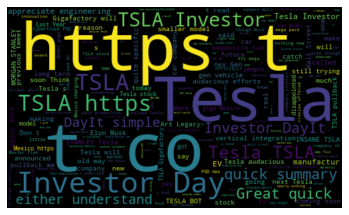

In [140]:
allwords=''.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=100).generate(allwords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [141]:
df[df.Analysis==0]

,Date,Tweets,Polarity,Subjectivity,Analysis


In [142]:
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(df["Tweets"]).toarray()

In [146]:
y = df.loc[:,["Analysis"]]  # Target variables (last two columns)
X_train, X_test, y_train, y_test = train_test_split(df["Tweets"], y, test_size=0.3, random_state=42)



In [147]:
X_train

3215     💯. Another issue with $TSLA not Tesla is thes...
3126     The old way of making a  This is what  called...
697      Hey listen up you cry babies -     etc Invest...
3613     Good to see this guy's a liar too... Now I kn...
2374     THE TESLA BOT IS INSANE! ⚡️🤖 $TSLA https//t.c...
                              ...                        
1130    $TSLA  - anything in the pipeline for delinque...
1294     At the Tesla investor event, CEO Elon Musk wa...
860      Yesterday, Tesla did something savvy!They int...
3507     Great quick summary of $TSLA Investor DayIt's...
3174     MORGAN STANLEY “Tesla's audacious efforts on ...
Name: Tweets, Length: 2800, dtype: object

In [148]:
from sklearn.pipeline import Pipeline
p = Pipeline([('step1', CountVectorizer()),('step2', KNeighborsClassifier(n_neighbors=3))])

In [149]:
p.fit(X_train, y_train)

C:\Users\91906\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('step1', CountVectorizer()),
                ('step2', KNeighborsClassifier(n_neighbors=3))])

In [150]:
y_pred=p.predict(X_test)
y_pred

array(['Positive', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [151]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-Score: {:.2f}'.format(f1))

Accuracy: 0.79
Precision: 0.83
Recall: 0.79
F1-Score: 0.79


In [161]:
text=df.loc[13,"Tweets"]
text
#1 13  5

' At the Tesla investor event, CEO Elon Musk was expected to launch a much-awaited small, affordable electric vehicle. Instea…'

In [162]:
pred = p.predict([text])
pred

array(['Negative'], dtype=object)

In [160]:
 df.head(13)

,Date,Tweets,Polarity,Subjectivity,Analysis
0,2023-03-02,I was there. They were quite specific. 1. The...,0.066667,0.308333,Positive
1,2023-03-02,Love the commentary from the ATX Delta loun...,0.497727,0.650000,Positive
2,2023-03-02,What happen after these events with the $TSL...,0.000000,0.066667,Neutral
3,2023-03-02,What was the big news from #Tesla Investor Da...,0.000000,0.550000,Neutral
4,2023-03-02,Something for Tesla's head of IR to ponder as...,0.100000,0.700000,Positive
5,2023-03-02,"Massive..Tesla basically said ""copy or perish...",0.000000,0.000000,Neutral
6,2023-03-02,Tesla Investor day has analysts questioning 'h...,0.000000,0.000000,Neutral
7,2023-03-02,I bet a $100 you have $TSLA or Tesla in your ...,0.433333,0.833333,Positive
8,2023-03-02,The article confused delivery with productio...,0.075000,0.481250,Positive
9,2023-03-02,i especially like Sandy when he doesn’t give...,0.142857,0.767857,Positive
